# 1. First we will go and start downloading the dataset from kaggle


In [ ]:
!kaggle datasets download -d kmader/food41

Dataset URL: https://www.kaggle.com/datasets/kmader/food41
License(s): copyright-authors
100% 5.30G/5.30G [01:24<00:00, 114MB/s] 
100% 5.30G/5.30G [01:24<00:00, 67.5MB/s]


In [ ]:
 !unzip food41.zip

Streaming output truncated to the last 5000 lines.
  inflating: images/tacos/1026681.jpg  
  inflating: images/tacos/1030289.jpg  
  inflating: images/tacos/1033196.jpg  
  inflating: images/tacos/1036030.jpg  
  inflating: images/tacos/1042175.jpg  
  inflating: images/tacos/1044043.jpg  
  inflating: images/tacos/1058697.jpg  
  inflating: images/tacos/1059239.jpg  
  inflating: images/tacos/1059326.jpg  
  inflating: images/tacos/1066762.jpg  
  inflating: images/tacos/1070967.jpg  
  inflating: images/tacos/1073468.jpg  
  inflating: images/tacos/1075296.jpg  
  inflating: images/tacos/1085243.jpg  
  inflating: images/tacos/108529.jpg  
  inflating: images/tacos/1086014.jpg  
  inflating: images/tacos/108945.jpg  
  inflating: images/tacos/1089575.jpg  
  inflating: images/tacos/1091159.jpg  
  inflating: images/tacos/1101369.jpg  
  inflating: images/tacos/1109058.jpg  
  inflating: images/tacos/1109744.jpg  
  inflating: images/tacos/1119371.jpg  
  inflating: images/tacos/11237

# 2. Now we will divide the dataset into train and test folders

In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Paths
source_dir = "images"  # Source folder containing all categories
train_dir = "train"  # Train folder
test_dir = "test"  # Test folder

# Create train and test directories if they don't exist
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Iterate through each category folder in the source directory
for category in os.listdir(source_dir):
    category_path = os.path.join(source_dir, category)

    if os.path.isdir(category_path):
        # Create corresponding train and test directories for the category
        os.makedirs(os.path.join(train_dir, category), exist_ok=True)
        os.makedirs(os.path.join(test_dir, category), exist_ok=True)

        # Get all image files in the category
        images = [img for img in os.listdir(category_path) if os.path.isfile(os.path.join(category_path, img))]

        # Split the data into 80% train and 20% test
        train_images, test_images = train_test_split(images, test_size=0.2, random_state=42)

        # Move train images to the train folder
        for img in train_images:
            shutil.move(os.path.join(category_path, img), os.path.join(train_dir, category, img))

        # Move test images to the test folder
        for img in test_images:
            shutil.move(os.path.join(category_path, img), os.path.join(test_dir, category, img))

print("Dataset has been split into train and test sets.")


Dataset has been split into train and test sets.


In [ ]:
from pathlib import Path

# Setup paths for train and test directories in Colab
base_dir = Path("/content/")  # Colab working directory
train_dir = base_dir / "train"
test_dir = base_dir / "test"

# Check if paths are correct
print(f"Train Directory: {train_dir}")
print(f"Test Directory: {test_dir}")

# To list files in train/test folders (optional)
train_files = list(train_dir.glob("**/*"))
test_files = list(test_dir.glob("**/*"))

print(f"Number of files in Train: {len(train_files)}")
print(f"Number of files in Test: {len(test_files)}")



Train Directory: /content/train
Test Directory: /content/test
Number of files in Train: 80901
Number of files in Test: 20301


# 3. We will import a random image from the dataset and check their parameters

In [ ]:
 import random
from pathlib import Path
from PIL import Image

# Set the base directory for train and test folders
base_dir = Path("/content/")

# Set train and test directories
train_dir = base_dir / "train"
test_dir = base_dir / "test"

# Set seed for reproducibility
random.seed(10)

# 1. Get all image paths from train and test folders
image_path_list = list(train_dir.glob("*/*.jpg")) + list(test_dir.glob("*/*.jpg"))

# 2. Pick a random image
random_image_path = random.choice(image_path_list)
print(f"Random image path: {random_image_path}")

# 3. Get image class from the path name (category)
image_class = random_image_path.parent.stem
print(f"Image class: {image_class}")

# 4. Open image
img = Image.open(random_image_path)

# 5. Print metadata
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")

# Display the image
img.show()  # This will open the image in a separate window or show it in Colab.


Random image path: /content/train/waffles/764801.jpg
Image class: waffles
Random image path: /content/train/waffles/764801.jpg
Image class: waffles
Image height: 512
Image width: 512


Random image path: /content/train/waffles/764801.jpg
Image class: waffles
Image class: waffles
Image height: 512
Image width: 512


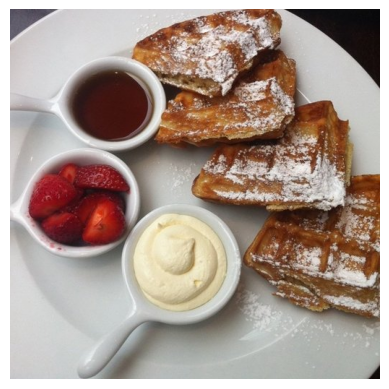

In [ ]:
import random
from pathlib import Path
from PIL import Image
import matplotlib.pyplot as plt

# Set the base directory for train and test folders
base_dir = Path("/content/")

# Set train and test directories
train_dir = base_dir / "train"
test_dir = base_dir / "test"

# Set seed for reproducibility
random.seed(10)

# 1. Get all image paths from train and test folders
image_path_list = list(train_dir.glob("*/*.jpg")) + list(test_dir.glob("*/*.jpg"))

# 2. Pick a random image
random_image_path = random.choice(image_path_list)
print(f"Random image path: {random_image_path}")

# 3. Get image class from the path name (category)
image_class = random_image_path.parent.stem
print(f"Image class: {image_class}")

# 4. Open image
img = Image.open(random_image_path)

# 5. Print metadata
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")

# 6. Display the image using Matplotlib
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()


 # 3. Transforming Data
 1. Converting data into tensors
 2. Turn it into a `torch.utils.data.Dataset` and a `torch.utils.data ` DataLoader and we will call irt dataset and dataLoader

In [ ]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

## 3.1 Transforming data with torchvision.transforms

In [ ]:
# Write transform for image
data_transform = transforms.Compose([
    # Resize the images to 64x64
    transforms.Resize(size=(64, 64)),
    # Flip the images randomly on the horizontal
    transforms.RandomHorizontalFlip(p=0.5), # p = probability of flip, 0.5 = 50% chance
    # Turn the image into a torch.Tensor
    transforms.ToTensor() # this also converts all pixel values from 0 to 255 to be between 0.0 and 1.0
])

In [ ]:
data_transform(img).shape

torch.Size([3, 64, 64])

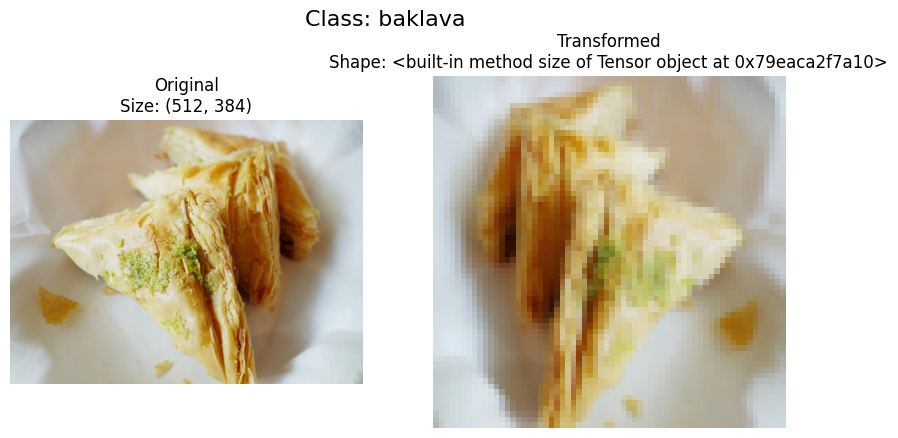

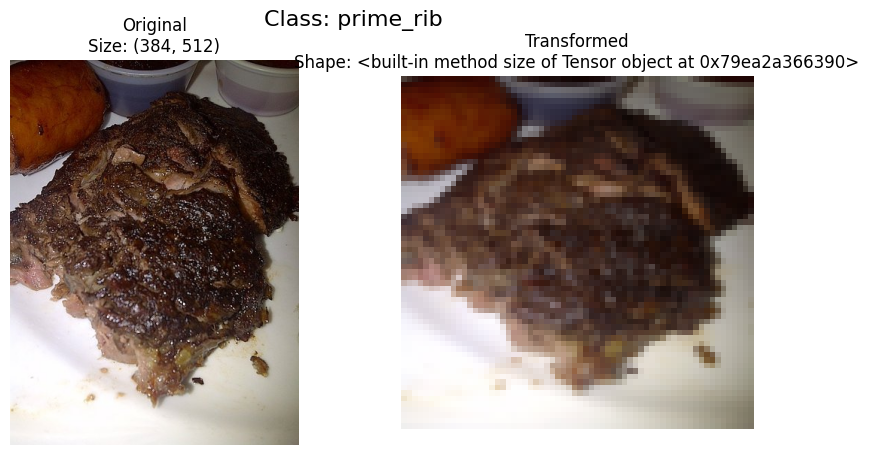

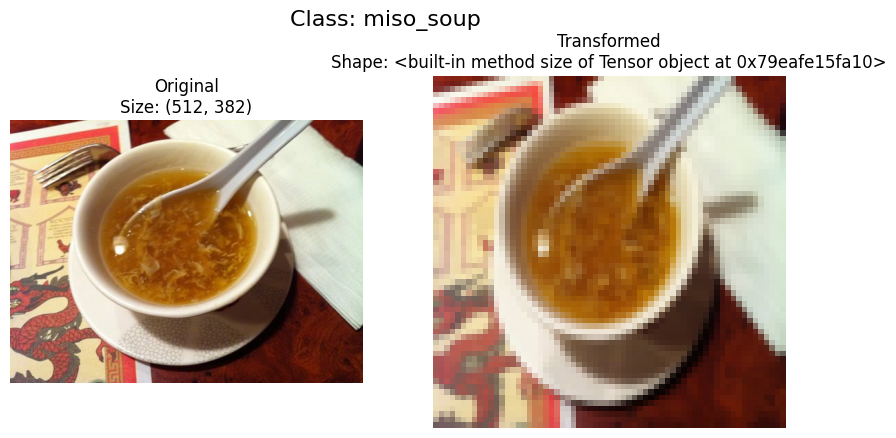

In [ ]:


def plot_transformed_images(image_paths, transform, n=3, seed=10):
    """
    Select random images from a list of image paths, apply a transformation to them,
    and then plot the original vs. the transformed version.
    """
    if seed is not None:
        random.seed(seed)

    random_image_paths = random.sample(image_paths, k=n)

    for image_path in random_image_paths:
        with Image.open(image_path) as img:
            fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
            ax[0].imshow(img)
            ax[0].set_title(f"Original\nSize: {img.size}")
            ax[0].axis("off")

            # Transform and plot the target image
            transformed_image = transform(img).permute(1,2,0)
            ax[1].imshow(transformed_image)
            ax[1].set_title(f"Transformed\nShape: {transformed_image.size}")
            ax[1].axis("off")

            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

plot_transformed_images(image_path_list,
                        transform=data_transform,
                        n=3,
                        seed=None)

## 4. Option 1: Loading Image data using `Image Folder`

In [ ]:


# Use ImageFolder to create dataset(s)
from torchvision import datasets
train_data = datasets.ImageFolder(root=train_dir, # target folder of images
                                  transform=data_transform, # transforms to perform on data (images)
                                  target_transform=None) # transforms to perform on labels (if necessary)

test_data = datasets.ImageFolder(root=test_dir,
                                 transform=data_transform)

print(f"Train data:\n{train_data}\nTest data:\n{test_data}")


Train data:
Dataset ImageFolder
    Number of datapoints: 80800
    Root location: /content/train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )
Test data:
Dataset ImageFolder
    Number of datapoints: 20200
    Root location: /content/test
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )


In [ ]:
# Get class names as a list
class_names = train_data.classes
class_names

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito',
 'bruschetta',
 'caesar_salad',
 'cannoli',
 'caprese_salad',
 'carrot_cake',
 'ceviche',
 'cheese_plate',
 'cheesecake',
 'chicken_curry',
 'chicken_quesadilla',
 'chicken_wings',
 'chocolate_cake',
 'chocolate_mousse',
 'churros',
 'clam_chowder',
 'club_sandwich',
 'crab_cakes',
 'creme_brulee',
 'croque_madame',
 'cup_cakes',
 'deviled_eggs',
 'donuts',
 'dumplings',
 'edamame',
 'eggs_benedict',
 'escargots',
 'falafel',
 'filet_mignon',
 'fish_and_chips',
 'foie_gras',
 'french_fries',
 'french_onion_soup',
 'french_toast',
 'fried_calamari',
 'fried_rice',
 'frozen_yogurt',
 'garlic_bread',
 'gnocchi',
 'greek_salad',
 'grilled_cheese_sandwich',
 'grilled_salmon',
 'guacamole',
 'gyoza',
 'hamburger',
 'hot_and_sour_soup',
 'hot_dog',
 'huevos_rancheros',
 'hummus',
 'ice_cream',
 'lasagna',
 'lobster_bisque',
 'lobster

In [ ]:
# Can also get class names as a dict
class_dict = train_data.class_to_idx
class_dict


{'apple_pie': 0,
 'baby_back_ribs': 1,
 'baklava': 2,
 'beef_carpaccio': 3,
 'beef_tartare': 4,
 'beet_salad': 5,
 'beignets': 6,
 'bibimbap': 7,
 'bread_pudding': 8,
 'breakfast_burrito': 9,
 'bruschetta': 10,
 'caesar_salad': 11,
 'cannoli': 12,
 'caprese_salad': 13,
 'carrot_cake': 14,
 'ceviche': 15,
 'cheese_plate': 16,
 'cheesecake': 17,
 'chicken_curry': 18,
 'chicken_quesadilla': 19,
 'chicken_wings': 20,
 'chocolate_cake': 21,
 'chocolate_mousse': 22,
 'churros': 23,
 'clam_chowder': 24,
 'club_sandwich': 25,
 'crab_cakes': 26,
 'creme_brulee': 27,
 'croque_madame': 28,
 'cup_cakes': 29,
 'deviled_eggs': 30,
 'donuts': 31,
 'dumplings': 32,
 'edamame': 33,
 'eggs_benedict': 34,
 'escargots': 35,
 'falafel': 36,
 'filet_mignon': 37,
 'fish_and_chips': 38,
 'foie_gras': 39,
 'french_fries': 40,
 'french_onion_soup': 41,
 'french_toast': 42,
 'fried_calamari': 43,
 'fried_rice': 44,
 'frozen_yogurt': 45,
 'garlic_bread': 46,
 'gnocchi': 47,
 'greek_salad': 48,
 'grilled_cheese_sa

In [ ]:
# Check the lengths
len(train_data), len(test_data)

(80800, 20200)

In [ ]:
# Index on the train_data Dataset to get a singleimage and label
img, label = train_data[0][0], train_data[0][1]
print(f"Image tensor:\n{img}")
print(f"Image shape: {img.shape}")
print(f"Image datatype: {img.dtype}")
print(f"Image label: {label}")
print(f"Label datatype: {type(label)}")

Image tensor:
tensor([[[0.1529, 0.1608, 0.1569,  ..., 0.2745, 0.2196, 0.1922],
         [0.1961, 0.2039, 0.2118,  ..., 0.3451, 0.2863, 0.2588],
         [0.2157, 0.2745, 0.2745,  ..., 0.4078, 0.4000, 0.3686],
         ...,
         [0.2078, 0.1922, 0.1843,  ..., 0.3176, 0.2902, 0.2824],
         [0.2000, 0.2039, 0.2078,  ..., 0.2235, 0.2471, 0.2039],
         [0.1765, 0.1765, 0.1882,  ..., 0.2078, 0.2510, 0.2275]],

        [[0.1608, 0.1647, 0.1608,  ..., 0.2510, 0.2196, 0.2078],
         [0.1843, 0.1922, 0.2078,  ..., 0.3098, 0.2431, 0.2078],
         [0.2118, 0.2588, 0.2667,  ..., 0.4039, 0.3804, 0.3373],
         ...,
         [0.1961, 0.1843, 0.1765,  ..., 0.2863, 0.2510, 0.2431],
         [0.1843, 0.1882, 0.1922,  ..., 0.2196, 0.2431, 0.2078],
         [0.1569, 0.1647, 0.1765,  ..., 0.2157, 0.2275, 0.2196]],

        [[0.1412, 0.1569, 0.1451,  ..., 0.2157, 0.2000, 0.1882],
         [0.1725, 0.1843, 0.2118,  ..., 0.2863, 0.2275, 0.1843],
         [0.2078, 0.2549, 0.2627,  ..., 0.38

Original shape: torch.Size([3, 64, 64]) -> [color_channels, height, width]
Image permute shape: torch.Size([64, 64, 3]) -> [height, width, color_channels]


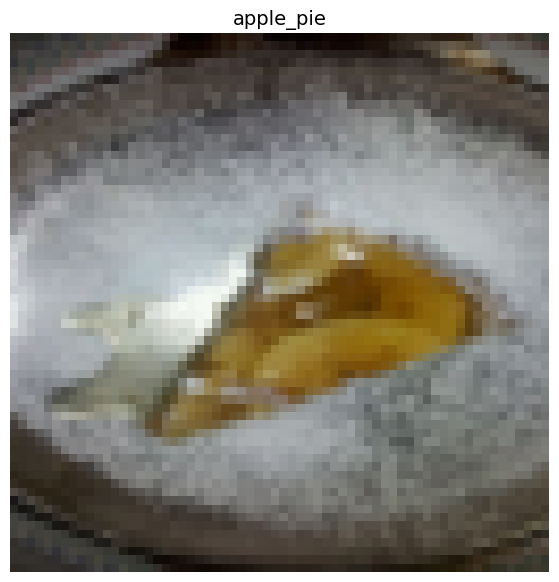

In [ ]:
# Rearrange the order of dimensions
img_permute = img.permute(1, 2, 0)

# Print out different shapes (before and after permute)
print(f"Original shape: {img.shape} -> [color_channels, height, width]")
print(f"Image permute shape: {img_permute.shape} -> [height, width, color_channels]")

# Plot the image
plt.figure(figsize=(10, 7))
plt.imshow(img.permute(1, 2, 0))
plt.axis("off")
plt.title(class_names[label], fontsize=14);

# 4 Turn dataset into `DataLoaders`
A `DataLoader` is going to help us turn our datasets into itntervals and we can customize the batch_size so our model can see batch_size images at a time

In [ ]:
import os
os.cpu_count()

2

In [ ]:


# Turn train and test Datasets into DataLoaders
from torch.utils.data import DataLoader
BATCH_SIZE = 64
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE, # how many samples per batch?
                              num_workers=1, # how many subprocesses to use for data loading? (higher = more)
                              shuffle=True) # shuffle the data?

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             num_workers=1,
                             shuffle=False) # don't usually need to shuffle testing data

train_dataloader, test_dataloader


(<torch.utils.data.dataloader.DataLoader at 0x79ea292eb8b0>,
 <torch.utils.data.dataloader.DataLoader at 0x79ea292eb460>)

In [ ]:


img, label = next(iter(train_dataloader))

# Batch size will now be 1, try changing the batch_size parameter above and see what happens
print(f"Image shape: {img.shape} -> [batch_size, color_channels, height, width]")
print(f"Label shape: {label.shape}")

Image shape: torch.Size([64, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Label shape: torch.Size([64])


In [ ]:
import os
import pathlib
import torch

from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, Dict, List

In [ ]:
# Instance of torchvision.datasets.ImageFolder()
train_data.classes, train_data.class_to_idx

(['apple_pie',
  'baby_back_ribs',
  'baklava',
  'beef_carpaccio',
  'beef_tartare',
  'beet_salad',
  'beignets',
  'bibimbap',
  'bread_pudding',
  'breakfast_burrito',
  'bruschetta',
  'caesar_salad',
  'cannoli',
  'caprese_salad',
  'carrot_cake',
  'ceviche',
  'cheese_plate',
  'cheesecake',
  'chicken_curry',
  'chicken_quesadilla',
  'chicken_wings',
  'chocolate_cake',
  'chocolate_mousse',
  'churros',
  'clam_chowder',
  'club_sandwich',
  'crab_cakes',
  'creme_brulee',
  'croque_madame',
  'cup_cakes',
  'deviled_eggs',
  'donuts',
  'dumplings',
  'edamame',
  'eggs_benedict',
  'escargots',
  'falafel',
  'filet_mignon',
  'fish_and_chips',
  'foie_gras',
  'french_fries',
  'french_onion_soup',
  'french_toast',
  'fried_calamari',
  'fried_rice',
  'frozen_yogurt',
  'garlic_bread',
  'gnocchi',
  'greek_salad',
  'grilled_cheese_sandwich',
  'grilled_salmon',
  'guacamole',
  'gyoza',
  'hamburger',
  'hot_and_sour_soup',
  'hot_dog',
  'huevos_rancheros',
  'hummu

In [ ]:


# 1. Take in a Dataset as well as a list of class names
def display_random_images(dataset: torch.utils.data.dataset.Dataset,
                          classes: List[str] = None,
                          n: int = 10,
                          display_shape: bool = True,
                          seed: int = None):

    # 2. Adjust display if n too high
    if n > 10:
        n = 10
        display_shape = False
        print(f"For display purposes, n shouldn't be larger than 10, setting to 10 and removing shape display.")

    # 3. Set random seed
    if seed:
        random.seed(seed)

    # 4. Get random sample indexes
    random_samples_idx = random.sample(range(len(dataset)), k=n)

    # 5. Setup plot
    plt.figure(figsize=(16, 8))

    # 6. Loop through samples and display random samples
    for i, targ_sample in enumerate(random_samples_idx):
        targ_image, targ_label = dataset[targ_sample][0], dataset[targ_sample][1]

        # 7. Adjust image tensor shape for plotting: [color_channels, height, width] -> [color_channels, height, width]
        targ_image_adjust = targ_image.permute(1, 2, 0)

        # Plot adjusted samples
        plt.subplot(1, n, i+1)
        plt.imshow(targ_image_adjust)
        plt.axis("off")
        if classes:
            title = f"class: {classes[targ_label]}"
            if display_shape:
                title = title + f"\nshape: {targ_image_adjust.shape}"
        plt.title(title)

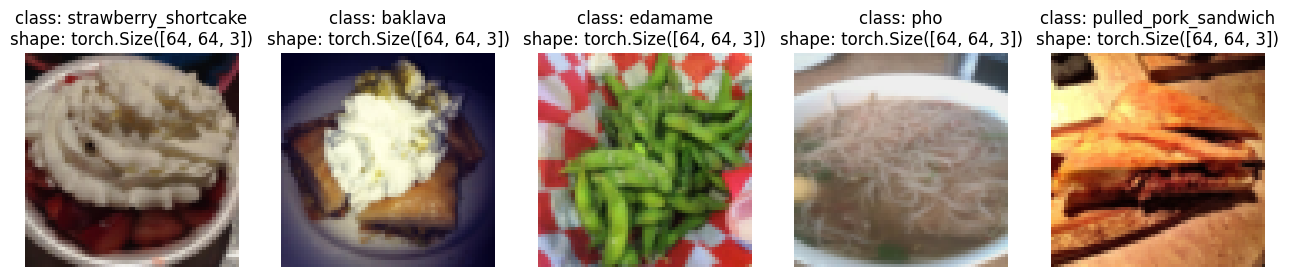

In [ ]:
# Display random images from ImageFolder created Dataset
display_random_images(train_data,
                      n=5,
                      classes=class_names,
                      seed=None)


In [ ]:
# Make function to find classes in target directory
def find_classes(directory: str) -> Tuple[List[str], Dict[str, int]]:
    """Finds the class folder names in a target directory.

    Assumes target directory is in standard image classification format.

    Args:
        directory (str): target directory to load classnames from.

    Returns:
        Tuple[List[str], Dict[str, int]]: (list_of_class_names, dict(class_name: idx...))

    Example:
        find_classes("food_images/train")
        >>> (["class_1", "class_2"], {"class_1": 0, ...})
    """
    # 1. Get the class names by scanning the target directory
    classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())

    # 2. Raise an error if class names not found
    if not classes:
        raise FileNotFoundError(f"Couldn't find any classes in {directory}.")

    # 3. Create a dictionary of index labels (computers prefer numerical rather than string labels)
    class_to_idx = {cls_name: i for i, cls_name in enumerate(classes)}
    return classes, class_to_idx

# 5 Create a Custom `dataset` to replicate `Imagefolder`

In [ ]:
# Write a custom dataset class (inherits from torch.utils.data.Dataset)
from torch.utils.data import Dataset

# 1. Subclass torch.utils.data.Dataset
class ImageFolderCustom(Dataset):

    # 2. Initialize with a targ_dir and transform (optional) parameter
    def __init__(self, targ_dir: str, transform=None) -> None:

        # 3. Create class attributes
        # Get all image paths
        self.paths = list(pathlib.Path(targ_dir).glob("*/*.jpg")) # note: you'd have to update this if you've got .png's or .jpeg's
        # Setup transforms
        self.transform = transform
        # Create classes and class_to_idx attributes
        self.classes, self.class_to_idx = find_classes(targ_dir)

    # 4. Make function to load images
    def load_image(self, index: int) -> Image.Image:
        "Opens an image via a path and returns it."
        image_path = self.paths[index]
        return Image.open(image_path)

    # 5. Overwrite the __len__() method (optional but recommended for subclasses of torch.utils.data.Dataset)
    def __len__(self) -> int:
        "Returns the total number of samples."
        return len(self.paths)

    # 6. Overwrite the __getitem__() method (required for subclasses of torch.utils.data.Dataset)
    def __getitem__(self, index: int) -> Tuple[torch.Tensor, int]:
        "Returns one sample of data, data and label (X, y)."
        img = self.load_image(index)
        class_name  = self.paths[index].parent.name # expects path in data_folder/class_name/image.jpeg
        class_idx = self.class_to_idx[class_name]

        # Transform if necessary
        if self.transform:
            return self.transform(img), class_idx # return data, label (X, y)
        else:
            return img, class_idx # return data, label (X, y)


In [ ]:
# Augment train data
from torchvision import transforms
train_transforms = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

# Don't augment test data, only reshape
test_transforms = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])


In [ ]:
train_data_custom = ImageFolderCustom(targ_dir=train_dir,
                                      transform=train_transforms)
test_data_custom = ImageFolderCustom(targ_dir=test_dir,
                                     transform=test_transforms)
train_data_custom, test_data_custom

(<__main__.ImageFolderCustom at 0x79ea292eb700>,
 <__main__.ImageFolderCustom at 0x79ea2916f340>)

In [ ]:

len(train_data_custom), len(test_data_custom)

(80800, 20200)

In [ ]:
train_data_custom.classes

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito',
 'bruschetta',
 'caesar_salad',
 'cannoli',
 'caprese_salad',
 'carrot_cake',
 'ceviche',
 'cheese_plate',
 'cheesecake',
 'chicken_curry',
 'chicken_quesadilla',
 'chicken_wings',
 'chocolate_cake',
 'chocolate_mousse',
 'churros',
 'clam_chowder',
 'club_sandwich',
 'crab_cakes',
 'creme_brulee',
 'croque_madame',
 'cup_cakes',
 'deviled_eggs',
 'donuts',
 'dumplings',
 'edamame',
 'eggs_benedict',
 'escargots',
 'falafel',
 'filet_mignon',
 'fish_and_chips',
 'foie_gras',
 'french_fries',
 'french_onion_soup',
 'french_toast',
 'fried_calamari',
 'fried_rice',
 'frozen_yogurt',
 'garlic_bread',
 'gnocchi',
 'greek_salad',
 'grilled_cheese_sandwich',
 'grilled_salmon',
 'guacamole',
 'gyoza',
 'hamburger',
 'hot_and_sour_soup',
 'hot_dog',
 'huevos_rancheros',
 'hummus',
 'ice_cream',
 'lasagna',
 'lobster_bisque',
 'lobster

In [ ]:
train_data_custom.class_to_idx

{'apple_pie': 0,
 'baby_back_ribs': 1,
 'baklava': 2,
 'beef_carpaccio': 3,
 'beef_tartare': 4,
 'beet_salad': 5,
 'beignets': 6,
 'bibimbap': 7,
 'bread_pudding': 8,
 'breakfast_burrito': 9,
 'bruschetta': 10,
 'caesar_salad': 11,
 'cannoli': 12,
 'caprese_salad': 13,
 'carrot_cake': 14,
 'ceviche': 15,
 'cheese_plate': 16,
 'cheesecake': 17,
 'chicken_curry': 18,
 'chicken_quesadilla': 19,
 'chicken_wings': 20,
 'chocolate_cake': 21,
 'chocolate_mousse': 22,
 'churros': 23,
 'clam_chowder': 24,
 'club_sandwich': 25,
 'crab_cakes': 26,
 'creme_brulee': 27,
 'croque_madame': 28,
 'cup_cakes': 29,
 'deviled_eggs': 30,
 'donuts': 31,
 'dumplings': 32,
 'edamame': 33,
 'eggs_benedict': 34,
 'escargots': 35,
 'falafel': 36,
 'filet_mignon': 37,
 'fish_and_chips': 38,
 'foie_gras': 39,
 'french_fries': 40,
 'french_onion_soup': 41,
 'french_toast': 42,
 'fried_calamari': 43,
 'fried_rice': 44,
 'frozen_yogurt': 45,
 'garlic_bread': 46,
 'gnocchi': 47,
 'greek_salad': 48,
 'grilled_cheese_sa

In [ ]:
# Check for equality amongst our custom Dataset and ImageFolder Dataset
print((len(train_data_custom) == len(train_data)) & (len(test_data_custom) == len(test_data)))
print(train_data_custom.classes == train_data.classes)
print(train_data_custom.class_to_idx == train_data.class_to_idx)


True
True
True


## 5.1 Create a function to display random images

1. Take a `Dataset` and a number o other parameters such as classes names and how many images to visualize
2. To prevent the display getting out of hand, lets cap the number of images to see at 10
3. set the random seed for reproducebility
4. Get a random sample of images and plot them with matplotlib
5. setup matplotlib plot
6. Loop through the random sample images and plot them wiht matplotklib
7. Make sure the dimensions of our images line up with matplotlib

In [ ]:
# 1. Take in a Dataset as well as a list of class names
def display_random_images(dataset: torch.utils.data.dataset.Dataset,
                          classes: List[str] = None,
                          n: int = 10,
                          display_shape: bool = True,
                          seed: int = None):

    # 2. Adjust display if n too high
    if n > 10:
        n = 10
        display_shape = False
        print(f"For display purposes, n shouldn't be larger than 10, setting to 10 and removing shape display.")

    # 3. Set random seed
    if seed:
        random.seed(seed)

    # 4. Get random sample indexes
    random_samples_idx = random.sample(range(len(dataset)), k=n)

    # 5. Setup plot
    plt.figure(figsize=(16, 8))

    # 6. Loop through samples and display random samples
    for i, targ_sample in enumerate(random_samples_idx):
        targ_image, targ_label = dataset[targ_sample][0], dataset[targ_sample][1]

        # 7. Adjust image tensor shape for plotting: [color_channels, height, width] -> [color_channels, height, width]
        targ_image_adjust = targ_image.permute(1, 2, 0)

        # Plot adjusted samples
        plt.subplot(1, n, i+1)
        plt.imshow(targ_image_adjust)
        plt.axis("off")
        if classes:
            title = f"class: {classes[targ_label]}"
            if display_shape:
                title = title + f"\nshape: {targ_image_adjust.shape}"
        plt.title(title)

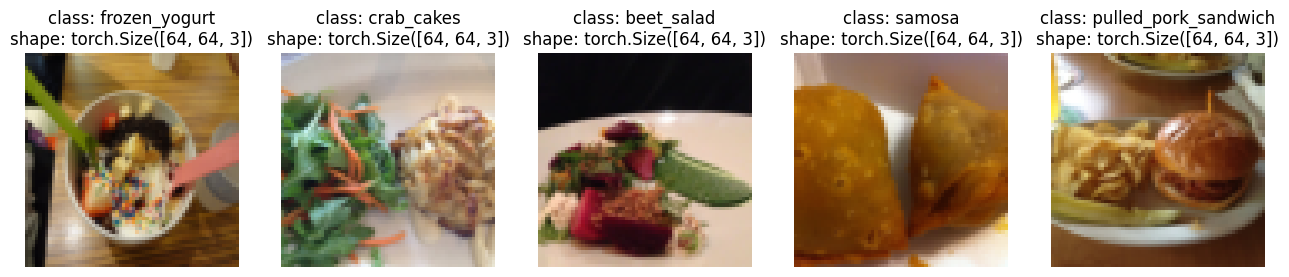

In [ ]:
# Display random images from ImageFolder created Dataset
display_random_images(train_data,
                      n=5,
                      classes=class_names,
                      seed=None)

### 5.2 Turn custom loaded images into `DataLoaders`

In [ ]:
# Turn train and test custom Dataset's into DataLoader's
from torch.utils.data import DataLoader
BATCH_SIZE = 64
NUM_WORKERS = os.cpu_count()
train_dataloader_custom = DataLoader(dataset=train_data_custom, # use custom created train Dataset
                                     batch_size=BATCH_SIZE, # how many samples per batch?
                                     num_workers=NUM_WORKERS, # how many subprocesses to use for data loading? (higher = more)
                                     shuffle=True) # shuffle the data?

test_dataloader_custom = DataLoader(dataset=test_data_custom, # use custom created test Dataset
                                    batch_size=BATCH_SIZE,
                                    num_workers=NUM_WORKERS,
                                    shuffle=False) # don't usually need to shuffle testing data

train_dataloader_custom, test_dataloader_custom

(<torch.utils.data.dataloader.DataLoader at 0x79ea26f63fa0>,
 <torch.utils.data.dataloader.DataLoader at 0x79ea26f63ac0>)

In [ ]:

# Get image and label from custom DataLoader
img_custom, label_custom = next(iter(train_dataloader_custom))

# Batch size will now be 1, try changing the batch_size parameter above and see what happens
print(f"Image shape: {img_custom.shape} -> [batch_size, color_channels, height, width]")
print(f"Label shape: {label_custom.shape}")

Image shape: torch.Size([64, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Label shape: torch.Size([64])


## 6. Other forms of transforms (data augemntation )

## 6.1 Data Augmentation
1. Initially, the model was trained without data augmentation, but it started overfitting.
2. To address this, I augmented the data in the training folder using the code below.
3. The model performed well at the start of training.
4. However, after several epochs, it began to overfit again. In response, I increased the level of augmentation in the training data, as shown in the updated code below.

In [ ]:

# # 1. Load and transform data
# from torchvision import datasets
# train_data_simple = datasets.ImageFolder(root=train_dir, transform=simple_transform)
# test_data_simple = datasets.ImageFolder(root=test_dir, transform=simple_transform)

# # 2. Turn data into DataLoaders
# import os
# from torch.utils.data import DataLoader

# # Setup batch size and number of workers
# BATCH_SIZE = 64
# NUM_WORKERS = os.cpu_count()
# print(f"Creating DataLoader's with batch size {BATCH_SIZE} and {NUM_WORKERS} workers.")

# # Create DataLoader's
# train_dataloader_simple = DataLoader(train_data_simple,
#                                      batch_size=BATCH_SIZE,
#                                      shuffle=True,
#                                      num_workers=NUM_WORKERS)

# test_dataloader_simple = DataLoader(test_data_simple,
#                                     batch_size=BATCH_SIZE,
#                                     shuffle=False,
#                                     num_workers=NUM_WORKERS)

# train_dataloader_simple, test_dataloader_simple

## 6.2 More Augmentated data

In [ ]:
# # lets look at trivial arguement
# from torchvision import transforms

# train_transform = transforms.Compose([transforms.Resize(size = (224,224)),
#                                     transforms.TrivialAugmentWide(num_magnitude_bins=31),
#                                     transforms.ToTensor()])


# test_transform = transforms.Compose([transforms.Resize(size=(224,224)),
#                                      transforms.ToTensor()])
from torchvision import transforms

# Define the transformations for training
train_transform = transforms.Compose([
    transforms.Resize(size=(224, 224)),                # Resize to 224x224
    transforms.TrivialAugmentWide(num_magnitude_bins=31), # Apply TrivialAugmentWide
    transforms.RandomHorizontalFlip(),                 # Randomly flip the image horizontally
    transforms.RandomRotation(degrees=10),             # Randomly rotate image by 10 degrees
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1), # Change brightness, contrast, etc.
    transforms.RandomResizedCrop(224, scale=(0.8, 1.0)), # Randomly crop the image and resize to 224x224
    transforms.ToTensor(),                             # Convert the image to Tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406],   # Normalize with ImageNet stats
                         std=[0.229, 0.224, 0.225])
])

# Define the transformations for testing (without augmentation)
test_transform = transforms.Compose([
    transforms.Resize(size=(224, 224)),   # Resize to 224x224
    transforms.ToTensor(),                # Convert the image to Tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406],   # Normalize with ImageNet stats
                         std=[0.229, 0.224, 0.225])
])


In [ ]:
# Create simple transform
simple_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
])


In [ ]:

from torchvision import datasets

# Use the augmentations in train_transform for training data
train_data_simple = datasets.ImageFolder(root=train_dir, transform=train_transform)

# Keep simple_transform for test data (no augmentations)
test_data_simple = datasets.ImageFolder(root=test_dir, transform=test_transform)

# 2. Turn data into DataLoaders
import os
from torch.utils.data import DataLoader

# Setup batch size and number of workers
BATCH_SIZE = 64
NUM_WORKERS = os.cpu_count()
print(f"Creating DataLoader's with batch size {BATCH_SIZE} and {NUM_WORKERS} workers.")

# Create DataLoader's
train_dataloader_simple = DataLoader(train_data_simple,
                                     batch_size=BATCH_SIZE,
                                     shuffle=True,
                                     num_workers=NUM_WORKERS)

test_dataloader_simple = DataLoader(test_data_simple,
                                    batch_size=BATCH_SIZE,
                                    shuffle=False,
                                    num_workers=NUM_WORKERS)

train_dataloader_simple, test_dataloader_simple


Creating DataLoader's with batch size 64 and 2 workers.


(<torch.utils.data.dataloader.DataLoader at 0x79ea26f35510>,
 <torch.utils.data.dataloader.DataLoader at 0x79ea26f354e0>)

# 7. Make tiny `VGG Model`
1. Since we are image processing everything we various model in market like resnet, vgg , etc;
2. So I made a tiny `VGG Model` and passed through the training data but it was badly overfitting
3. So I made bigger `VGG model` and it was also overfitting.

In [ ]:
 import torch
import torch.nn as nn

class TinyVGG(nn.Module):
    """
    TinyVGG architecture:
    A smaller version of VGG, used for image classification tasks.
    """
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int) -> None:
        super().__init__()

        # First conv block
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, out_channels=hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)  # Reduces image size by half
        )

        # Second conv block
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units*2, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units*2, out_channels=hidden_units*2, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)  # Reduces image size by half again
        )

        # Compute the flattened size dynamically based on input size
        def get_flattened_size(img_size: int) -> int:
            with torch.no_grad():
                dummy_input = torch.randn(1, input_shape, img_size, img_size)
                x = self.conv_block_1(dummy_input)
                x = self.conv_block_2(x)
                return x.numel()

        # Assuming your input image size is 64x64
        flattened_size = get_flattened_size(64)

        # Classifier
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=flattened_size, out_features=output_shape)  # Update based on computed flattened size
        )

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = self.conv_block_1(x)
        x = self.conv_block_2(x)
        return self.classifier(x)

# Example usage
torch.manual_seed(42)
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Create the model with the correct input/output parameters
model_tiny_vgg = TinyVGG(input_shape=3, hidden_units=10, output_shape=len(train_data.classes)).to(device)

print(model_tiny_vgg)


TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(20, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=5120, out_features=101, bias=True)
  )
)


In [ ]:
# 1. Get a batch of images and labels from the DataLoader
img_batch, label_batch = next(iter(train_dataloader_simple))

# 2. Get a single image from the batch and unsqueeze the image so its shape fits the model
img_single, label_single = img_batch[0].unsqueeze(dim=0), label_batch[0]
print(f"Single image shape: {img_single.shape}\n")

# 3. Perform a forward pass on a single image
model_tiny_vgg.eval()  # Set the model to evaluation mode
with torch.inference_mode():  # No need to track gradients
    pred = model_tiny_vgg(img_single.to(device))  # Corrected variable name

# 4. Print out what's happening and convert model logits -> pred probs -> pred label
print(f"Output logits:\n{pred}\n")
print(f"Output prediction probabilities:\n{torch.softmax(pred, dim=1)}\n")
print(f"Output prediction label:\n{torch.argmax(torch.softmax(pred, dim=1), dim=1)}\n")
print(f"Actual label:\n{label_single}")


Single image shape: torch.Size([1, 3, 224, 224])



RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x62720 and 5120x101)

In [ ]:
# Install torchinfo if it's not available, import it if it is
try:
    import torchinfo
except:
    !pip install torchinfo
    import torchinfo

from torchinfo import summary
summary(model_tiny_vgg, input_size=[1, 3, 64, 64]) # do a test pass through of an example input size


In [ ]:
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               device=device):
    # Put model in train mode
    model.train()

    # Setup train loss and train accuracy values
    train_loss, train_acc = 0, 0

    # Loop through data loader data batches
    for batch, (X, y) in enumerate(dataloader):
        # Send data to target device
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate  and accumulate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Calculate and accumulate accuracy metric across all batches
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item()/len(y_pred)

    # Adjust metrics to get average loss and accuracy per batch
    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc


NameError: name 'device' is not defined

In [ ]:


# create a test function
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              device=device):
    # Put model in eval mode
    model.eval()

    # Setup test loss and test accuracy values
    test_loss, test_acc = 0, 0

    # Turn on inference context manager
    with torch.inference_mode():
        # Loop through DataLoader batches
        for batch, (X, y) in enumerate(dataloader):
            # Send data to target device
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred_logits = model(X)

            # 2. Calculate and accumulate loss
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()

            # Calculate and accumulate accuracy
            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))

    # Adjust metrics to get average loss and accuracy per batch
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc


NameError: name 'device' is not defined

## 7.2 The end of `Tiny VGG Model`
1. This code, along with the previous one, was used for training data with the `Tiny VGG Model`.
2. The code below represents the final stages of the `Tiny VGG Model`.
3. To see how it performs, you can run the code with the basic data augmentation settings. This will give you an idea of why the model was not used. Simply uncomment the code for the initial augmentation (provided above) and comment out the code for the more extensive augmentation.

In [ ]:
import torch
import torch.nn as nn
from tqdm.auto import tqdm

# 1. Take in various parameters required for training and test steps
def train(model: torch.nn.Module,
          train_dataloader,
          test_dataloader,
          optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5,
          device=device):

    # 2. Create empty results dictionary
    results = {"train_loss": [],
        "train_acc": [],
        "test_loss": [],
        "test_acc": []
    }

    # 3. Loop through training and testing steps for a number of epochs
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model,
                                           dataloader=train_dataloader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer,
                                           device=device)
        test_loss, test_acc = test_step(model=model,
            dataloader=test_dataloader,
            loss_fn=loss_fn,
            device=device)

        # 4. Print out what's happening
        print(
            f"Epoch: {epoch} | "
            f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} | "
            f"test_loss: {test_loss:.4f} | "
            f"test_acc: {test_acc:.4f}"
        )

        # 5. Update results dictionary
        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)

    # 6. Return the filled results at the end of the epochs
    return results


NameError: name 'device' is not defined

# 8. Using `ResNet`
1. Since the VGG model wasn't providing accurate results, I switched to the `ResNet` model.
2. I utilized the pre-built `ResNet-18` model from PyTorch and trained it using basic augmented data. However, after 50% of the training, the model started overfitting. You can look the trainig epochs in below code I have stopped training after it started overfiting
3. To counter this, I applied additional data augmentation techniques in the training process. The results are shown in the code below.


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm.auto import tqdm
from torchvision import models

# Set device (GPU if available)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Define the ResNet18 model
class ResNet18(nn.Module):
    def __init__(self, num_classes):
        super(ResNet18, self).__init__()
        self.model = models.resnet18(pretrained=False)  # Set to True to use pre-trained weights
        self.model.fc = nn.Linear(self.model.fc.in_features, num_classes)  # Modify the final layer

    def forward(self, x):
        return self.model(x)

# Initialize the model with the number of classes in your dataset
num_classes = len(train_data_simple.classes)  # Adjust this based on your augmented dataset
model_resnet = ResNet18(num_classes=num_classes).to(device)

# Loss function and optimizer (SGD and CrossEntropy)
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model_resnet.parameters(), lr=0.1, momentum=0.9)

# Training loop (with progress bar using tqdm)
def train(model, train_dataloader, test_dataloader, optimizer, loss_fn, epochs):
    for epoch in tqdm(range(epochs)):
        model.train()  # Set the model to training mode
        running_loss = 0.0
        correct_train, total_train = 0, 0

        for batch, (X, y) in enumerate(train_dataloader):
            X, y = X.to(device), y.to(device)

            optimizer.zero_grad()  # Zero the gradients

            outputs = model(X)  # Forward pass
            loss = loss_fn(outputs, y)  # Compute loss

            loss.backward()  # Backpropagation
            optimizer.step()  # Update the weights

            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_train += y.size(0)
            correct_train += (predicted == y).sum().item()

        # Print training loss and accuracy
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {running_loss/len(train_dataloader):.4f}")
        print(f"Training Accuracy: {100 * correct_train / total_train:.2f}%")

        # Validation
        model.eval()  # Switch model to evaluation mode for validation
        correct_val, total_val = 0, 0
        with torch.no_grad():
            for X_val, y_val in test_dataloader:
                X_val, y_val = X_val.to(device), y_val.to(device)
                val_outputs = model(X_val)
                _, predicted = torch.max(val_outputs.data, 1)
                total_val += y_val.size(0)
                correct_val += (predicted == y_val).sum().item()

        # Print validation accuracy
        print(f"Validation Accuracy: {100 * correct_val / total_val:.2f}%")

    return model

# Example training
NUM_EPOCHS = 15  # Adjust epochs as per your requirement

# Use the augmented training data loader
trained_model_resnet = train(model_resnet, train_dataloader_simple, test_dataloader_simple, optimizer, loss_fn, NUM_EPOCHS)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch [1/15], Loss: 4.1704
Training Accuracy: 7.43%
Validation Accuracy: 11.16%
Epoch [2/15], Loss: 3.4938
Training Accuracy: 17.46%
Validation Accuracy: 19.38%
Epoch [3/15], Loss: 3.0763
Training Accuracy: 25.38%
Validation Accuracy: 18.88%
Epoch [4/15], Loss: 2.7611
Training Accuracy: 31.63%
Validation Accuracy: 21.92%
Epoch [5/15], Loss: 2.4578
Training Accuracy: 37.92%
Validation Accuracy: 27.00%
Epoch [6/15], Loss: 2.1624
Training Accuracy: 43.98%
Validation Accuracy: 25.63%
Epoch [7/15], Loss: 1.8432
Training Accuracy: 51.14%
Validation Accuracy: 26.45%


KeyboardInterrupt: 

# 9. Final `ResNet Model`
1. This is the model we've been aiming for. If you examine the training data, you'll see that the model is generalizing well, learning patterns, and making accurate predictions.
2. Unlike previous attempts, the model is neither overfitting nor underfitting.
3. This improvement is due to the increased data augmentation applied during training.
4. After training this model extensively, it can achieve high accuracy without the issues of underfitting or overfitting.
5. Since I was training on a free GPU in Colab, I couldn’t complete the full training. If you have access to a dedicated GPU or the upgraded Colab version, you can train it further and see how well the model can perform.
6. My assumption is that this model could become state-of-the-art for the Food-101 dataset if trained for 20 epochs. If you’re still not satisfied, try training for 25 epochs.
7. On a free GPU runtime, each epoch took approximately 20 minutes.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm.auto import tqdm
from torchvision import models

# Set device (GPU if available)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Define the ResNet18 model
class ResNet18(nn.Module):
    def __init__(self, num_classes):
        super(ResNet18, self).__init__()
        self.model = models.resnet18(pretrained=False)  # Set to True to use pre-trained weights
        self.model.fc = nn.Linear(self.model.fc.in_features, num_classes)  # Modify the final layer

    def forward(self, x):
        return self.model(x)

# Initialize the model with the number of classes in your dataset
num_classes = len(train_data_simple.classes)  # Adjust this based on your augmented dataset
model_resnet = ResNet18(num_classes=num_classes).to(device)

# Loss function and optimizer (SGD and CrossEntropy)
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model_resnet.parameters(), lr=0.1, momentum=0.9)

# Training loop (with progress bar using tqdm)
def train(model, train_dataloader, test_dataloader, optimizer, loss_fn, epochs):
    for epoch in tqdm(range(epochs)):
        model.train()  # Set the model to training mode
        running_loss = 0.0
        correct_train, total_train = 0, 0

        for batch, (X, y) in enumerate(train_dataloader):
            X, y = X.to(device), y.to(device)

            optimizer.zero_grad()  # Zero the gradients

            outputs = model(X)  # Forward pass
            loss = loss_fn(outputs, y)  # Compute loss

            loss.backward()  # Backpropagation
            optimizer.step()  # Update the weights

            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_train += y.size(0)
            correct_train += (predicted == y).sum().item()

        # Print training loss and accuracy
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {running_loss/len(train_dataloader):.4f}")
        print(f"Training Accuracy: {100 * correct_train / total_train:.2f}%")

        # Validation
        model.eval()  # Switch model to evaluation mode for validation
        correct_val, total_val = 0, 0
        with torch.no_grad():
            for X_val, y_val in test_dataloader:
                X_val, y_val = X_val.to(device), y_val.to(device)
                val_outputs = model(X_val)
                _, predicted = torch.max(val_outputs.data, 1)
                total_val += y_val.size(0)
                correct_val += (predicted == y_val).sum().item()

        # Print validation accuracy
        print(f"Validation Accuracy: {100 * correct_val / total_val:.2f}%")

    return model

# Example training
NUM_EPOCHS = 15  # Adjust epochs as per your requirement
# Use the augmented training data loader
trained_model_resnet = train(model_resnet, train_dataloader_simple, test_dataloader_simple, optimizer, loss_fn, NUM_EPOCHS)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch [1/15], Loss: 4.4568
Training Accuracy: 3.53%
Validation Accuracy: 7.35%
Epoch [2/15], Loss: 4.0984
Training Accuracy: 8.33%
Validation Accuracy: 12.95%
Epoch [3/15], Loss: 3.7082
Training Accuracy: 14.43%
Validation Accuracy: 20.86%
Epoch [4/15], Loss: 3.3109
Training Accuracy: 22.07%
Validation Accuracy: 30.37%
Epoch [5/15], Loss: 2.9500
Training Accuracy: 29.10%
Validation Accuracy: 37.42%
Epoch [6/15], Loss: 2.6456
Training Accuracy: 35.33%
Validation Accuracy: 40.23%
Epoch [7/15], Loss: 2.4285
Training Accuracy: 39.98%
Validation Accuracy: 44.06%
Epoch [8/15], Loss: 2.2502
Training Accuracy: 43.87%
Validation Accuracy: 47.29%
Epoch [9/15], Loss: 2.1151
Training Accuracy: 46.70%
Validation Accuracy: 47.21%
Epoch [10/15], Loss: 1.9992
Training Accuracy: 49.30%
Validation Accuracy: 53.47%
Epoch [11/15], Loss: 1.8908
Training Accuracy: 52.00%
Validation Accuracy: 56.93%
Epoch [12/15], Loss: 1.8014
Training Accuracy: 53.85%
Validation Accuracy: 55.76%


## 9.1 Ploting the model result
1. I was not able to train the model but i have plotted thwe model result and it will give you better idea.


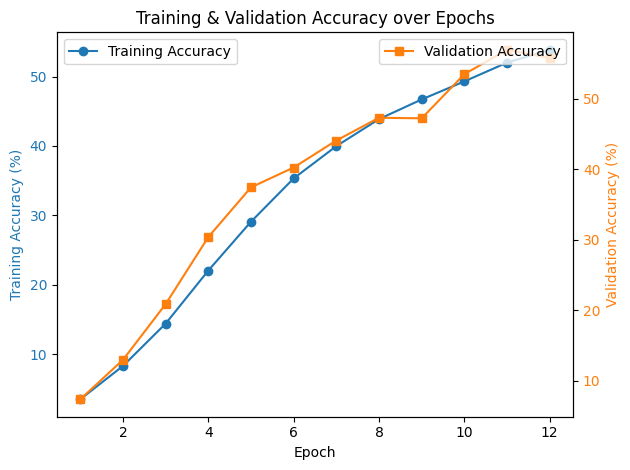

In [6]:
import matplotlib.pyplot as plt

# Data from the user's training and validation
epochs = list(range(1, 13))  # From epoch 1 to 12
training_accuracy = [3.53, 8.33, 14.43, 22.07, 29.10, 35.33, 39.98, 43.87, 46.70, 49.30, 52.00, 53.85]
validation_accuracy = [7.35, 12.95, 20.86, 30.37, 37.42, 40.23, 44.06, 47.29, 47.21, 53.47, 56.93, 55.76]

# Create the plot for accuracy
fig, ax1 = plt.subplots()

# Plotting Training Accuracy on the left Y-axis
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Training Accuracy (%)', color='tab:blue')
ax1.plot(epochs, training_accuracy, label='Training Accuracy', color='tab:blue', marker='o')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create another Y-axis for Validation Accuracy
ax2 = ax1.twinx()
ax2.set_ylabel('Validation Accuracy (%)', color='tab:orange')
ax2.plot(epochs, validation_accuracy, label='Validation Accuracy', color='tab:orange', marker='s')
ax2.tick_params(axis='y', labelcolor='tab:orange')

# Title and legends
plt.title('Training & Validation Accuracy over Epochs')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show plot
plt.tight_layout()
plt.show()


# 10. Save model using this code
- The model will be saved in the folder section of the collab change the code if you are running on a ide.

In [ ]:
# Path to save the trained model
MODEL_SAVE_PATH = "resnet18_augmented.pth"

# After training, save the model's state_dict (contains the weights)
torch.save(model_resnet.state_dict(), MODEL_SAVE_PATH)

print(f"Model saved to {MODEL_SAVE_PATH}")

# 11. Bigger `VGG Model`
- This was the bigger version of `Tiny VGG Model`but i didnt used after it was overfiting

In [ ]:
import torch
import torch.nn as nn

class VGG(nn.Module):
    """
    A VGG-like architecture (inspired by VGG-16).
    """
    def __init__(self, input_shape: int, output_shape: int) -> None:
        super().__init__()

        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, out_channels=64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        self.conv_block_3 = nn.Sequential(
            nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        self.conv_block_4 = nn.Sequential(
            nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        self.conv_block_5 = nn.Sequential(
            nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        # Calculate the output size after convolutional layers
        def get_flattened_size(img_size: int) -> int:
            with torch.no_grad():
                dummy_input = torch.randn(1, input_shape, img_size, img_size)
                x = self.conv_block_1(dummy_input)
                x = self.conv_block_2(x)
                x = self.conv_block_3(x)
                x = self.conv_block_4(x)
                x = self.conv_block_5(x)
                return x.numel()  # Flattened size

        flattened_size = get_flattened_size(64)  # 64x64 image input size
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=flattened_size, out_features=4096),
            nn.ReLU(),
            nn.Dropout(p=0.5),
            nn.Linear(in_features=4096, out_features=4096),
            nn.ReLU(),
            nn.Dropout(p=0.5),
            nn.Linear(in_features=4096, out_features=output_shape)
        )

    def forward(self, x: torch.Tensor):
        x = self.conv_block_1(x)
        x = self.conv_block_2(x)
        x = self.conv_block_3(x)
        x = self.conv_block_4(x)
        x = self.conv_block_5(x)
        x = self.classifier(x)
        return x

# Example usage:
torch.manual_seed(42)
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model_vgg = VGG(input_shape=3, output_shape=len(train_data.classes)).to(device)

model_vgg

VGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_3): Sequential(
    (0): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): ReLU()
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)


In [ ]:

# 1. Get a batch of images and labels from the DataLoader
img_batch, label_batch = next(iter(train_dataloader_simple))

# 2. Get a single image from the batch and unsqueeze the image so its shape fits the model
img_single, label_single = img_batch[0].unsqueeze(dim=0), label_batch[0]
print(f"Single image shape: {img_single.shape}\n")

# 3. Perform a forward pass on a single image
model_vgg.eval()
with torch.inference_mode():
    pred = model_vgg(img_single.to(device))

# 4. Print out what's happening and convert model logits -> pred probs -> pred label
print(f"Output logits:\n{pred}\n")
print(f"Output prediction probabilities:\n{torch.softmax(pred, dim=1)}\n")
print(f"Output prediction label:\n{torch.argmax(torch.softmax(pred, dim=1), dim=1)}\n")
print(f"Actual label:\n{label_single}")

Single image shape: torch.Size([1, 3, 64, 64])

Output logits:
tensor([[-2.1205e-03,  1.0451e-02,  7.5840e-03,  1.9384e-02,  1.3935e-02,
         -5.8844e-03,  7.2222e-03,  5.6639e-03,  1.7397e-02,  7.7524e-03,
         -1.1278e-02,  6.7050e-03,  8.1153e-03,  2.2492e-03, -1.4068e-02,
          5.3400e-03, -1.1661e-02,  8.8665e-03, -9.0225e-03, -6.6146e-03,
         -1.2819e-02, -1.3496e-03,  1.3652e-02, -1.0956e-02,  1.3987e-02,
         -1.1391e-02, -3.4963e-03, -8.1238e-03,  5.6510e-03, -9.2284e-03,
         -4.6528e-03,  5.5379e-04, -3.6323e-03, -5.5828e-03,  3.4743e-03,
          1.8195e-02,  6.3363e-03, -1.2565e-02,  3.5732e-03,  1.1124e-02,
         -5.6128e-03, -8.6632e-03,  2.0391e-03,  7.5348e-03,  1.6978e-02,
         -5.2233e-03, -5.3474e-03, -8.1827e-04,  2.6566e-03, -2.0188e-02,
          2.3717e-03,  9.3948e-03,  8.7573e-03, -4.9107e-03, -9.4751e-03,
         -1.0761e-02, -2.0634e-02,  1.3661e-02,  4.7859e-03,  1.4426e-02,
         -1.1071e-03,  1.0186e-02, -4.3879e-03,  

In [ ]:

# 1. Get a batch of images and labels from the DataLoader
img_batch, label_batch = next(iter(train_dataloader_simple))

# 2. Get a single image from the batch and unsqueeze the image so its shape fits the model
img_single, label_single = img_batch[0].unsqueeze(dim=0), label_batch[0]
print(f"Single image shape: {img_single.shape}\n")

# 3. Perform a forward pass on a single image
model_vgg.eval()
with torch.inference_mode():
    pred = model_vgg(img_single.to(device))

# 4. Print out what's happening and convert model logits -> pred probs -> pred label
print(f"Output logits:\n{pred}\n")
print(f"Output prediction probabilities:\n{torch.softmax(pred, dim=1)}\n")
print(f"Output prediction label:\n{torch.argmax(torch.softmax(pred, dim=1), dim=1)}\n")
print(f"Actual label:\n{label_single}")

Single image shape: torch.Size([1, 3, 64, 64])

Output logits:
tensor([[-2.1204e-03,  1.0451e-02,  7.5840e-03,  1.9384e-02,  1.3935e-02,
         -5.8843e-03,  7.2221e-03,  5.6639e-03,  1.7397e-02,  7.7523e-03,
         -1.1278e-02,  6.7050e-03,  8.1153e-03,  2.2490e-03, -1.4068e-02,
          5.3399e-03, -1.1660e-02,  8.8666e-03, -9.0225e-03, -6.6146e-03,
         -1.2819e-02, -1.3496e-03,  1.3653e-02, -1.0956e-02,  1.3987e-02,
         -1.1391e-02, -3.4964e-03, -8.1237e-03,  5.6510e-03, -9.2285e-03,
         -4.6527e-03,  5.5387e-04, -3.6322e-03, -5.5826e-03,  3.4743e-03,
          1.8195e-02,  6.3362e-03, -1.2565e-02,  3.5732e-03,  1.1124e-02,
         -5.6129e-03, -8.6633e-03,  2.0392e-03,  7.5348e-03,  1.6978e-02,
         -5.2232e-03, -5.3474e-03, -8.1826e-04,  2.6565e-03, -2.0188e-02,
          2.3715e-03,  9.3948e-03,  8.7572e-03, -4.9107e-03, -9.4749e-03,
         -1.0761e-02, -2.0634e-02,  1.3661e-02,  4.7859e-03,  1.4426e-02,
         -1.1072e-03,  1.0186e-02, -4.3878e-03,  

In [ ]:
# Install torchinfo if it's not available, import it if it is
try:
    import torchinfo
except:
    !pip install torchinfo
    import torchinfo

from torchinfo import summary
summary(model_vgg, input_size=[1, 3, 64, 64]) # do a test pass through of an example input size


Layer (type:depth-idx)                   Output Shape              Param #
VGG                                      [1, 101]                  --
├─Sequential: 1-1                        [1, 64, 32, 32]           --
│    └─Conv2d: 2-1                       [1, 64, 64, 64]           1,792
│    └─ReLU: 2-2                         [1, 64, 64, 64]           --
│    └─Conv2d: 2-3                       [1, 64, 64, 64]           36,928
│    └─ReLU: 2-4                         [1, 64, 64, 64]           --
│    └─MaxPool2d: 2-5                    [1, 64, 32, 32]           --
├─Sequential: 1-2                        [1, 128, 16, 16]          --
│    └─Conv2d: 2-6                       [1, 128, 32, 32]          73,856
│    └─ReLU: 2-7                         [1, 128, 32, 32]          --
│    └─Conv2d: 2-8                       [1, 128, 32, 32]          147,584
│    └─ReLU: 2-9                         [1, 128, 32, 32]          --
│    └─MaxPool2d: 2-10                   [1, 128, 16, 16]          --

In [ ]:


# create a train fucntion
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               device=device):
    # Put model in train mode
    model.train()

    # Setup train loss and train accuracy values
    train_loss, train_acc = 0, 0

    # Loop through data loader data batches
    for batch, (X, y) in enumerate(dataloader):
        # Send data to target device
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate  and accumulate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Calculate and accumulate accuracy metric across all batches
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item()/len(y_pred)

    # Adjust metrics to get average loss and accuracy per batch
    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc

In [ ]:
# create a test function
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              device=device):
    # Put model in eval mode
    model.eval()

    # Setup test loss and test accuracy values
    test_loss, test_acc = 0, 0

    # Turn on inference context manager
    with torch.inference_mode():
        # Loop through DataLoader batches
        for batch, (X, y) in enumerate(dataloader):
            # Send data to target device
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred_logits = model(X)

            # 2. Calculate and accumulate loss
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()

            # Calculate and accumulate accuracy
            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))

    # Adjust metrics to get average loss and accuracy per batch
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc


In [ ]:
from tqdm.auto import tqdm

# 1. Take in various parameters required for training and test steps
def train(model: torch.nn.Module,
          train_dataloader,
          test_dataloader,
          optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5,
          device=device):

    # 2. Create empty results dictionary
    results = {"train_loss": [],
        "train_acc": [],
        "test_loss": [],
        "test_acc": []
    }

    # 3. Loop through training and testing steps for a number of epochs
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model,
                                           dataloader=train_dataloader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer,
                                           device=device)
        test_loss, test_acc = test_step(model=model,
            dataloader=test_dataloader,
            loss_fn=loss_fn,
            device=device)

        # 4. Print out what's happening
        print(
            f"Epoch: {epoch} | "
            f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} | "
            f"test_loss: {test_loss:.4f} | "
            f"test_acc: {test_acc:.4f}"
        )

        # 5. Update results dictionary
        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)

    # 6. Return the filled results at the end of the epochs
    return results


In [ ]:
# Set random seeds
torch.manual_seed(10)
torch.cuda.manual_seed(10)

# Set number of epochs
NUM_EPOCHS = 5

# Recreate an instance of VGG
model_vgg = VGG(input_shape=3, output_shape=len(train_data.classes)).to(device)

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_vgg.parameters(), lr=0.001)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Train model
model_vgg_results = train(model=model_vgg,
                        train_dataloader=train_dataloader_simple,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time - start_time:.3f} seconds")


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0 | train_loss: 4.6163 | train_acc: 0.0089 | test_loss: 4.6152 | test_acc: 0.0099
Epoch: 1 | train_loss: 4.6157 | train_acc: 0.0089 | test_loss: 4.6152 | test_acc: 0.0099
Epoch: 2 | train_loss: 4.6157 | train_acc: 0.0094 | test_loss: 4.6152 | test_acc: 0.0099
Epoch: 3 | train_loss: 4.6157 | train_acc: 0.0094 | test_loss: 4.6151 | test_acc: 0.0099
Epoch: 4 | train_loss: 4.6156 | train_acc: 0.0091 | test_loss: 4.6151 | test_acc: 0.0099
Total training time: 1584.660 seconds


In [ ]:


# Check the model_0_results keys
model_vgg_results

{'train_loss': [4.616330019557466,
  4.615705213373083,
  4.615666741335666,
  4.615669183663122,
  4.615639830806004],
 'train_acc': [0.0088826207442597,
  0.0088826207442597,
  0.009439330958036422,
  0.009352731591448931,
  0.009080562153602534],
 'test_loss': [4.61520232731783,
  4.615159335015695,
  4.615153285521496,
  4.615147456338134,
  4.615147806421111],
 'test_acc': [0.009889240506329115,
  0.009889240506329115,
  0.009889240506329115,
  0.009889240506329115,
  0.009889240506329115]}

In [ ]:

# Check the model_0_results keys
model_vgg_results.keys()

dict_keys(['train_loss', 'train_acc', 'test_loss', 'test_acc'])

In [ ]:
def plot_loss_curves(results: Dict[str, List[float]]):
    """Plots training curves of a results dictionary.

    Args:
        results (dict): dictionary containing list of values, e.g.
            {"train_loss": [...],
             "train_acc": [...],
             "test_loss": [...],
             "test_acc": [...]}
    """

    # Get the loss values of the results dictionary (training and test)
    loss = results['train_loss']
    test_loss = results['test_loss']

    # Get the accuracy values of the results dictionary (training and test)
    accuracy = results['train_acc']
    test_accuracy = results['test_acc']

    # Figure out how many epochs there were
    epochs = range(len(results['train_loss']))

    # Setup a plot
    plt.figure(figsize=(15, 7))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label='train_loss')
    plt.plot(epochs, test_loss, label='test_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label='train_accuracy')
    plt.plot(epochs, test_accuracy, label='test_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend();

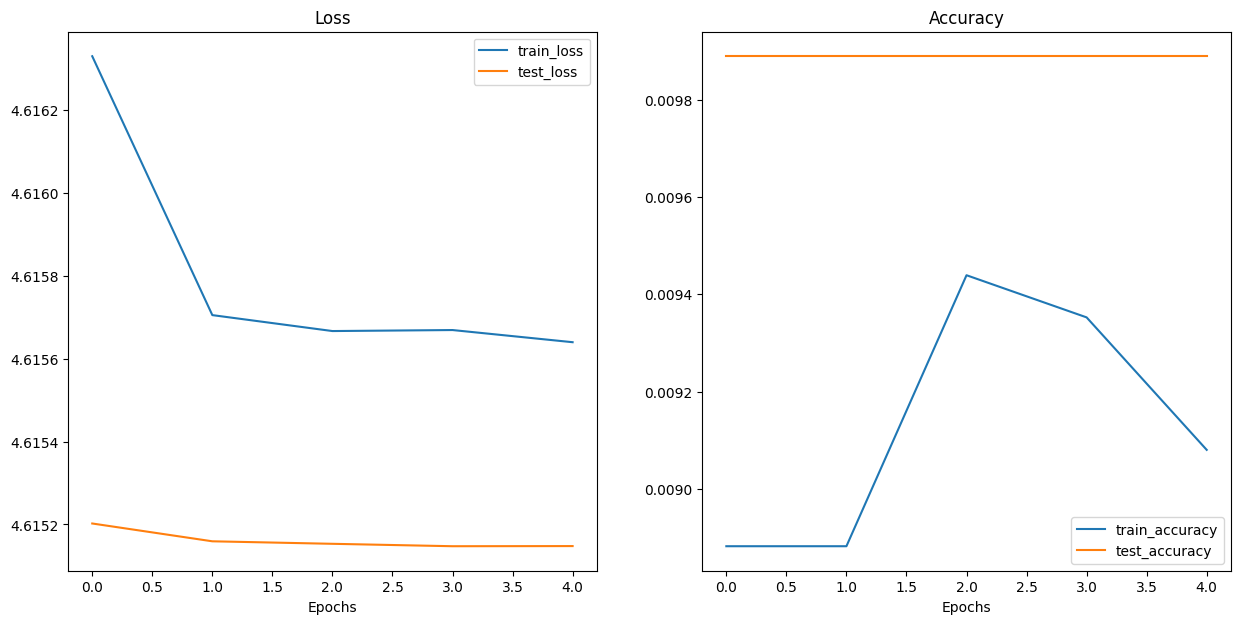

In [ ]:
plot_loss_curves(model_vgg_results)

In [ ]:
torch.manual_seed(42)
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model_1 = VGG(input_shape=3, output_shape=len(train_data.classes)).to(device)

model_1

VGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_3): Sequential(
    (0): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): ReLU()
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)


In [ ]:
# Set random seeds
torch.manual_seed(10)
torch.cuda.manual_seed(10)

# Set number of epochs
NUM_EPOCHS = 5

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_1.parameters(), lr=0.001)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Train model_1
model_1_results = train(model=model_1,
                        train_dataloader=train_dataloader_augmented,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0 | train_loss: 4.6162 | train_acc: 0.0091 | test_loss: 4.6152 | test_acc: 0.0099
Epoch: 1 | train_loss: 4.6157 | train_acc: 0.0086 | test_loss: 4.6151 | test_acc: 0.0099
Epoch: 2 | train_loss: 4.6157 | train_acc: 0.0089 | test_loss: 4.6151 | test_acc: 0.0099
Epoch: 3 | train_loss: 4.6157 | train_acc: 0.0088 | test_loss: 4.6151 | test_acc: 0.0099
Epoch: 4 | train_loss: 4.6157 | train_acc: 0.0086 | test_loss: 4.6152 | test_acc: 0.0099
Total training time: 1630.324 seconds


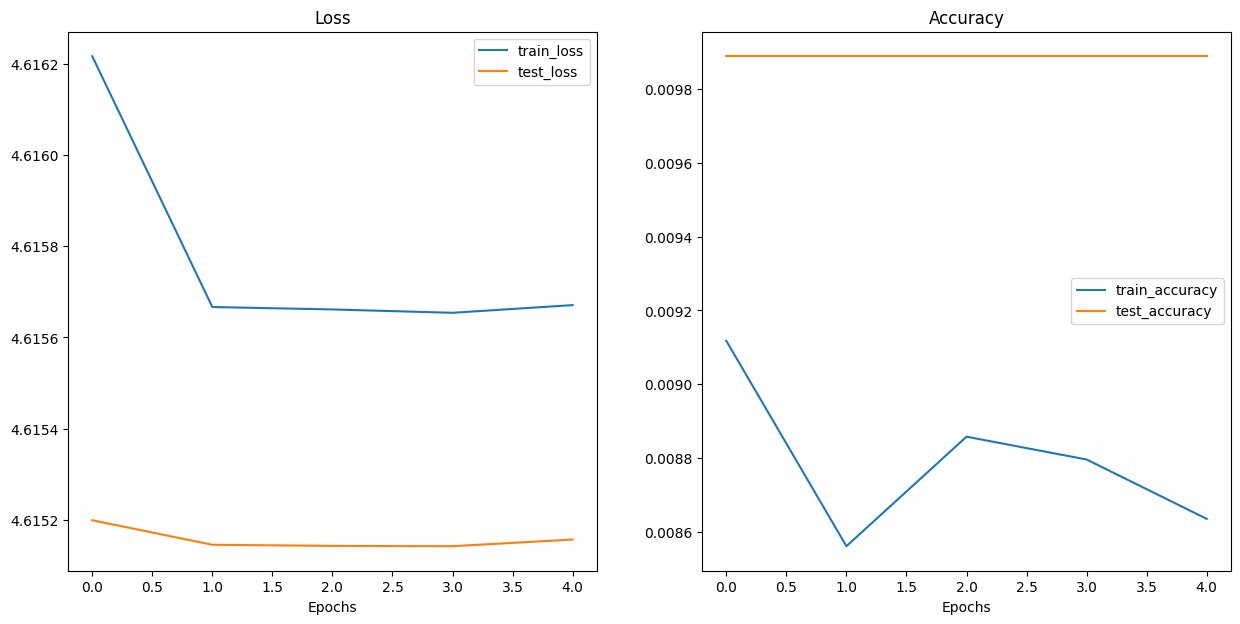

In [ ]:
plot_loss_curves(model_1_results)

# 12. Basic `ResNe Model`
- You can see the results why this model was not used

In [ ]:
import torch
import torch.nn as nn

class BasicBlock(nn.Module):
    """
    A basic residual block for ResNet.
    """
    def __init__(self, in_channels: int, out_channels: int, stride: int = 1, downsample: nn.Module = None) -> None:
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)
        self.downsample = downsample

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        identity = x
        if self.downsample is not None:
            identity = self.downsample(x)

        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        out = self.conv2(out)
        out = self.bn2(out)
        out += identity
        out = self.relu(out)
        return out

class ResNet(nn.Module):
    """
    A ResNet-like architecture with basic blocks.
    """
    def __init__(self, input_shape: int, output_shape: int) -> None:
        super().__init__()
        self.in_channels = 64
        self.conv1 = nn.Conv2d(input_shape, 64, kernel_size=7, stride=2, padding=3, bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.relu = nn.ReLU(inplace=True)
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)

        self.layer1 = self._make_layer(64, 2)
        self.layer2 = self._make_layer(128, 2, stride=2)
        self.layer3 = self._make_layer(256, 2, stride=2)
        self.layer4 = self._make_layer(512, 2, stride=2)

        # Calculate the output size after convolutional layers
        def get_flattened_size(img_size: int) -> int:
            with torch.no_grad():
                dummy_input = torch.randn(1, input_shape, img_size, img_size)
                x = self.conv1(dummy_input)
                x = self.bn1(x)
                x = self.relu(x)
                x = self.maxpool(x)
                x = self.layer1(x)
                x = self.layer2(x)
                x = self.layer3(x)
                x = self.layer4(x)
                return x.numel()  # Flattened size

        flattened_size = get_flattened_size(64)  # 64x64 image input size
        self.fc = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=flattened_size, out_features=4096),
            nn.ReLU(),
            nn.Dropout(p=0.5),
            nn.Linear(in_features=4096, out_features=4096),
            nn.ReLU(),
            nn.Dropout(p=0.5),
            nn.Linear(in_features=4096, out_features=output_shape)
        )

    def _make_layer(self, out_channels: int, blocks: int, stride: int = 1) -> nn.Sequential:
        downsample = None
        if stride != 1 or self.in_channels != out_channels:
            downsample = nn.Sequential(
                nn.Conv2d(self.in_channels, out_channels, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(out_channels),
            )

        layers = [BasicBlock(self.in_channels, out_channels, stride, downsample)]
        self.in_channels = out_channels
        for _ in range(1, blocks):
            layers.append(BasicBlock(out_channels, out_channels))

        return nn.Sequential(*layers)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        x = self.fc(x)
        return x

# Example usage:
torch.manual_seed(42)
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model_resnet = ResNet(input_shape=3, output_shape=len(train_data.classes)).to(device)

model_resnet


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader

def train_step(model: nn.Module,
               dataloader: DataLoader,
               loss_fn: nn.Module,
               optimizer: optim.Optimizer,
               device: torch.device) -> tuple:
    """
    Perform a training step on the model with the provided dataloader, loss function, and optimizer.

    Args:
        model (nn.Module): The model to train.
        dataloader (DataLoader): DataLoader providing the training data.
        loss_fn (nn.Module): Loss function to compute the loss.
        optimizer (Optimizer): Optimizer to update model parameters.
        device (torch.device): Device to perform computations on.

    Returns:
        tuple: Average loss and accuracy over the epoch.
    """
    model.train()  # Set model to training mode

    train_loss, train_acc = 0.0, 0.0  # Initialize loss and accuracy counters

    # Iterate through data batches
    for X, y in dataloader:
        X, y = X.to(device), y.to(device)  # Send data to device

        # Forward pass
        y_pred = model(X)

        # Calculate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item() * X.size(0)  # Accumulate loss for each batch

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Accuracy calculation
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item()  # Accumulate number of correct predictions

    # Average loss and accuracy
    avg_train_loss = train_loss / len(dataloader.dataset)
    avg_train_acc = train_acc / len(dataloader.dataset)

    return avg_train_loss, avg_train_acc


In [ ]:
def train_step(model: nn.Module,
               dataloader: DataLoader,
               loss_fn: nn.Module,
               optimizer: optim.Optimizer,
               device: torch.device) -> tuple:
    model.train()  # Set model to training mode

    train_loss, train_acc = 0.0, 0.0  # Initialize loss and accuracy counters

    # Iterate through data batches
    for X, y in dataloader:
        X, y = X.to(device), y.to(device)  # Send data to device

        # Forward pass
        y_pred = model(X)

        # Calculate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item() * X.size(0)  # Accumulate loss for each batch

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Accuracy calculation
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item()  # Accumulate number of correct predictions

    # Average loss and accuracy
    avg_train_loss = train_loss / len(dataloader.dataset)
    avg_train_acc = train_acc / len(dataloader.dataset)

    return avg_train_loss, avg_train_acc


In [ ]:
def train(model, train_dataloader, loss_fn, optimizer, device, epochs):
    for epoch in range(epochs):
        avg_train_loss, avg_train_acc = train_step(model, train_dataloader, loss_fn, optimizer, device)
        print(f"Epoch {epoch+1}/{epochs}, Loss: {avg_train_loss:.4f}, Accuracy: {avg_train_acc:.4f}")


In [ ]:
from tqdm import tqdm
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader

def train_step(model: nn.Module,
               dataloader: DataLoader,
               loss_fn: nn.Module,
               optimizer: optim.Optimizer,
               device: torch.device) -> tuple:
    model.train()  # Set model to training mode

    train_loss, train_acc = 0.0, 0.0  # Initialize loss and accuracy counters

    # Wrap dataloader with tqdm for progress tracking
    progress_bar = tqdm(dataloader, desc="Training", unit="batch")

    # Iterate through data batches
    for X, y in progress_bar:
        X, y = X.to(device), y.to(device)  # Send data to device

        # Forward pass
        y_pred = model(X)

        # Calculate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item() * X.size(0)  # Accumulate loss for each batch

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Accuracy calculation
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item()  # Accumulate number of correct predictions

        # Update progress bar description
        avg_batch_loss = loss.item()
        avg_batch_acc = (y_pred_class == y).sum().item() / len(y_pred)
        progress_bar.set_postfix(loss=avg_batch_loss, accuracy=avg_batch_acc)

    # Average loss and accuracy
    avg_train_loss = train_loss / len(dataloader.dataset)
    avg_train_acc = train_acc / len(dataloader.dataset)

    return avg_train_loss, avg_train_acc


In [ ]:
def train(model, train_dataloader, loss_fn, optimizer, device, epochs):
    for epoch in range(epochs):
        print(f"Epoch {epoch+1}/{epochs}")
        avg_train_loss, avg_train_acc = train_step(model, train_dataloader, loss_fn, optimizer, device)
        print(f"Loss: {avg_train_loss:.4f}, Accuracy: {avg_train_acc:.4f}")


In [ ]:
torch.manual_seed(10)
torch.cuda.manual_seed(10)

# Define device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Create model and move to device
model_resnet = ResNet(input_shape=3, output_shape=len(train_data.classes)).to(device)

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_resnet.parameters(), lr=0.1)

# Train the model
NUM_EPOCHS = 5
train(model_resnet, train_dataloader_simple, loss_fn, optimizer, device, NUM_EPOCHS)


Epoch 1/5


Training: 100%|██████████| 1263/1263 [03:59<00:00,  5.27batch/s, accuracy=0, loss=4.56]


Loss: 468.2301, Accuracy: 0.0104
Epoch 2/5


Training: 100%|██████████| 1263/1263 [04:03<00:00,  5.18batch/s, accuracy=0, loss=4.73]


Loss: 4.6467, Accuracy: 0.0098
Epoch 3/5


Training: 100%|██████████| 1263/1263 [03:56<00:00,  5.34batch/s, accuracy=0, loss=4.64]


Loss: 4.6479, Accuracy: 0.0096
Epoch 4/5


Training: 100%|██████████| 1263/1263 [04:02<00:00,  5.22batch/s, accuracy=0.0312, loss=4.65]


Loss: 388.6980, Accuracy: 0.0092
Epoch 5/5


Training: 100%|██████████| 1263/1263 [04:06<00:00,  5.11batch/s, accuracy=0, loss=4.63]

Loss: 5.2684, Accuracy: 0.0099
